In [1]:
'''
1) Write a python function that builds and trains the model, and 
outputs the final prediction and losses.
2) Write a function that creates the data and outputs x,y . x is the 
same as in 11) . y= m*x + randn/2. N=50
3) In a parametrix experiment, vary the slope from -2 to +2 in 21 steps.
Repeat the entire experiment 50 times.
4) Plot the loss and accuracy (co-relation of yhat,y) as a function of 
the slope.
'''

'\n1) Write a python function that builds and trains the model, and \noutputs the final prediction and losses.\n2) Write a function that creates the data and outputs x,y . x is the \nsame as in 11) . y= m*x + randn/2. N=50\n3) In a parametrix experiment, vary the slope from -2 to +2 in 21 steps.\nRepeat the entire experiment 50 times.\n4) Plot the loss and accuracy (co-relation of yhat,y) as a function of \nthe slope.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/qm/y3ntm4w54lv2x8p86n_p1ml80000gn/T/ipykernel_4727/3733540952.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
#A function that creates and trains the model

def buildandtrainthemodel(x,y):

    #Build the model
    
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  #Input Layer
        nn.ReLU(),       #activation layer
        nn.Linear(1,1),  #output layer
        )
    
    #loss and optimizer functions
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=0.5)
    
    '''
    This creates an optimizer object that will adjust the parameters 
    of the neural network model ('ANNreg') using the SGD optimization
    algorithm with a learning rate of 0.5 .
    '''
    #train the model
    numepochs = 500
    losses = torch.zeros(numepochs)
    
    '''
    This creates a pytorch tensor with length of numepochs and initializes
    it with 0.
    '''
    
    for epochi in range(numepochs):
        
        #forward pass
        yHat = ANNreg(x)
        
        #compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss
        
        #backprop
        optimizer.zero_grad() 
        '''This is used to clear out the gradients 
            of the parameters that the optimizer will uopdate.'''
        
        loss.backward()
        #It calculates gradients of neural network parameters wrt loss.
        
        optimizer.step()
        '''It updates the parameters of the neural network using the optimization
        algorithm. The optimizer uses these gradients to adjust the parameters to 
        minimize the loss function, effectively updating the model's weight and
        biases.
        '''
        #end training loop
        
        ##compute model predictions
        predictions = ANNreg(x)
        
        #output
    return predictions, losses

In [4]:
#A function that creates the data
def createTheData(m):
    N=50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return x,y

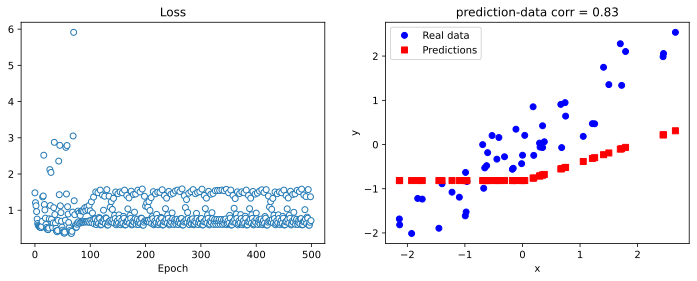

In [5]:
#Test it once

#create a dataset
x,y = createTheData(.8)

#run the model
yHat,losses = buildandtrainthemodel(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [6]:
'''
Usually, a simple regression model will outperform a deep learning model
for relatively startigh-forward data or where there is small amount of
data.
'''

'\nUsually, a simple regression model will outperform a deep learning model\nfor relatively startigh-forward data or where there is small amount of\ndata.\n'

In [7]:
#Now For the experiment

# (takes 3 mins with 21 slopes and 50 exps)

# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

#initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):
    
    for N in range(numExps):
        
        #create a dataset and run the model
        x,y = createTheData(slopes[slopei])
        yHat,losses = buildandtrainthemodel(x,y)
        
        #store the final loss and performance
        results[slopei,N,0] = losses[-1]
        results[slopei,N,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]

#corelation can be 0 if the model didnt do well. Set nan's -> 0
results[np.isnan(results)] = 0

/Users/pratik18/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/pratik18/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


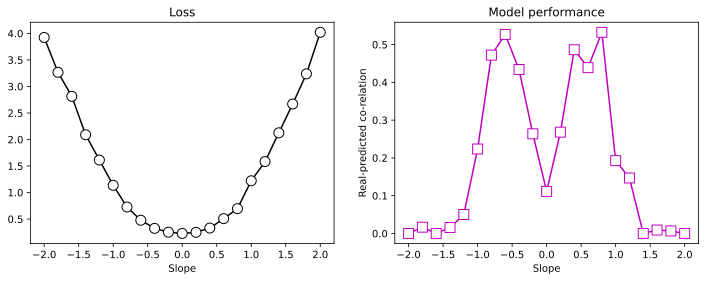

In [10]:
#plot the results

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted co-relation')
ax[1].set_title('Model performance')

plt.show()

In [ ]:
'''
Discussion
1) Why were losses larger with larger slopes, even though the fit 
to the data was better?
-> Losses are not normalized, they are in the scale of the data.
Larger slopes led to more variance in y.
Anns dont predict data values, they learn relationships across variables
(which might be too complex for humans)


'''